### Study of Outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from scipy.stats import stats
from scipy.stats import zscore
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="whitegrid")
title_font= {"family": "arial", "weight": "bold", "color": "darkred", "size": 13}
label_font= {"family": "arial", "weight": "bold", "color": "darkblue", "size": 10}

In [2]:
suicide_filepath = "Suicide world cleaned.csv"
df = pd.read_csv(suicide_filepath, parse_dates=True)
df.head()

,country,year,sex,age,suicides_no,population,suicide_per_100k,gdp_for_year,gdp_per_cap,generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,Europe


In [3]:
df["gdp_for_year"] = df["gdp_for_year"].replace(",", "", regex=True)
df["gdp_for_year"]= df["gdp_for_year"].astype("int64")
print("incorrect values for {}: ".format("gdp_for_year"))
for value in df["gdp_for_year"]:
    try:
        float(value)
    except:
        print(value)

incorrect values for gdp_for_year: 


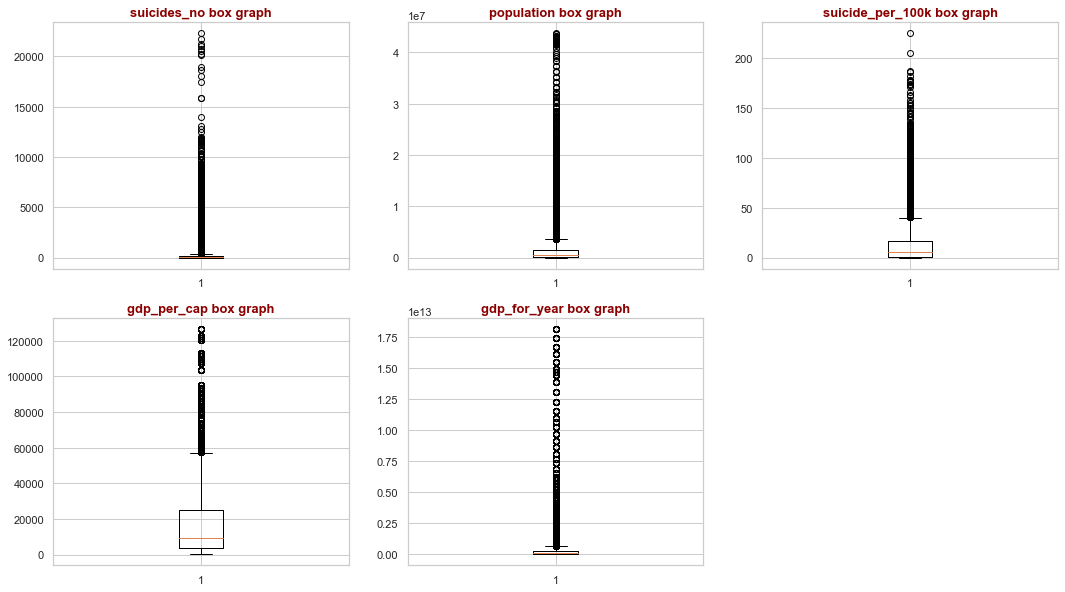

In [4]:
plt.figure(figsize=(18,10))
columns_name = ["suicides_no", "population","suicide_per_100k", "gdp_per_cap", "gdp_for_year" ]
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[columns_name[i]])
    plt.title("{} box graph".format(columns_name[i]), fontdict= title_font)

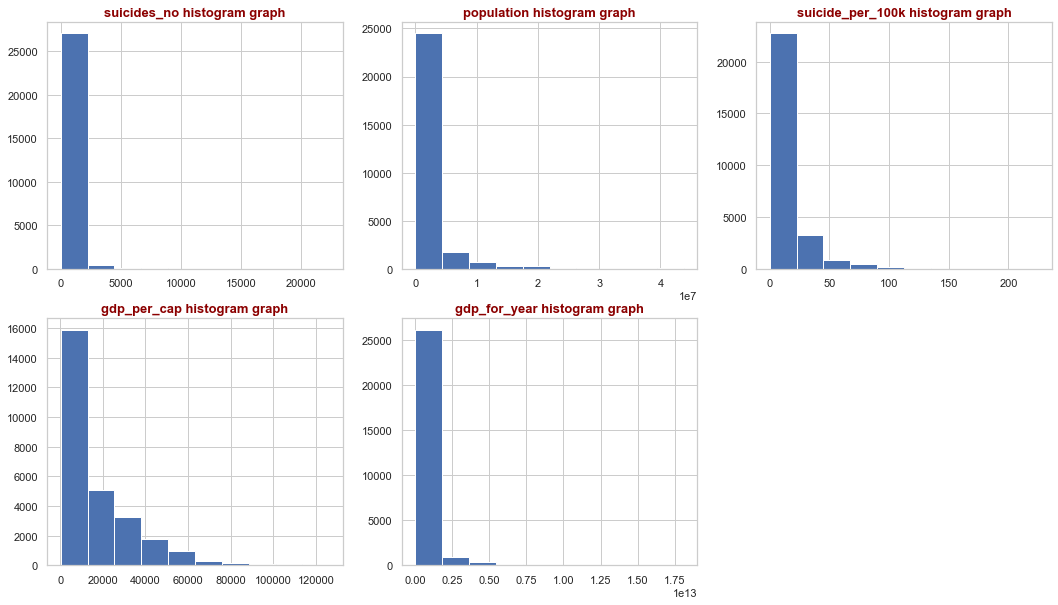

In [5]:
plt.figure(figsize=(18,10))
columns_name = ["suicides_no", "population","suicide_per_100k", "gdp_per_cap", "gdp_for_year" ]
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.hist(df[columns_name[i]])
    plt.title("{} histogram graph".format(columns_name[i]), fontdict=title_font)

As we see there are appear outliers in five columns; suicides_no, population, suicides_per_100k, gdp_per_cap, gdp_for_year.

#### We will review z score for suicides_no, population, suicides_per_100k, gdp_per_cap, gdp_for_year

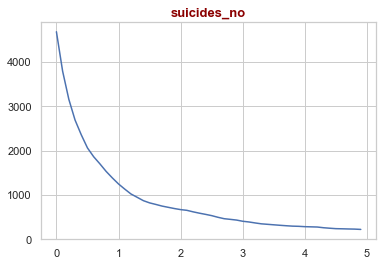

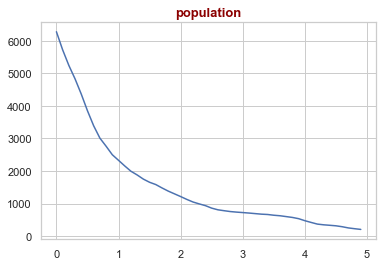

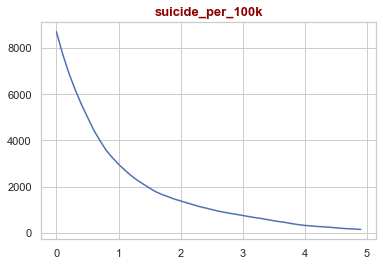

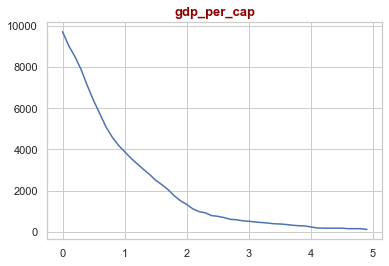

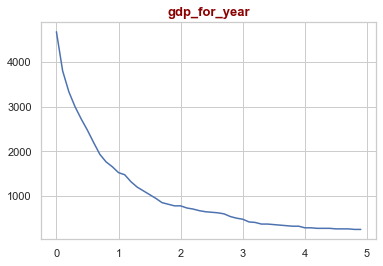

In [6]:
columns_name = ["suicides_no", "population","suicide_per_100k", "gdp_per_cap", "gdp_for_year" ]
for names in range(0,5): 
    zscorelist = []
    zscores = zscore(df[columns_name[names]])
    for thereshold in np.arange(0,5,0.1):
        zscorelist.append((thereshold,len(np.where(zscores>thereshold)[0]))) 
        df_outliers= pd.DataFrame(zscorelist, columns=["thereshold", "outliers"])
    plt.plot(df_outliers.thereshold, df_outliers.outliers)
    plt.title(columns_name[names], fontdict=title_font)
    plt.show()


We will review with Tukey's Method.

In [7]:
columns_name = ["suicides_no", "population","suicide_per_100k", "gdp_per_cap", "gdp_for_year" ]
for col in columns_name:
    q75, q25 = np.percentile(df[col], [75,25])
    caa = q75-q25
    comparison = pd.DataFrame(columns= [col, "thereshold", "outliers"])
    for thereshold in np.arange(1,5,0.5):
        min_value= q25- (caa*thereshold)
        max_value= q75+ (caa*thereshold)
        outliers= len(np.where((df[col]>max_value) | (df[col]<min_value))[0])
        comparison = comparison.append({col: col, "thereshold": thereshold,
                                             "outliers": outliers }, ignore_index=True)
    display(comparison)

,suicides_no,thereshold,outliers
0,suicides_no,1.0,4482
1,suicides_no,1.5,3877
2,suicides_no,2.0,3376
3,suicides_no,2.5,3026
4,suicides_no,3.0,2667
5,suicides_no,3.5,2433
6,suicides_no,4.0,2204
7,suicides_no,4.5,2029


,population,thereshold,outliers
0,population,1.0,4982
1,population,1.5,4151
2,population,2.0,3297
3,population,2.5,2771
4,population,3.0,2377
5,population,3.5,2066
6,population,4.0,1832
7,population,4.5,1648


,suicide_per_100k,thereshold,outliers
0,suicide_per_100k,1.0,2906
1,suicide_per_100k,1.5,2040
2,suicide_per_100k,2.0,1501
3,suicide_per_100k,2.5,1160
4,suicide_per_100k,3.0,892
5,suicide_per_100k,3.5,698
6,suicide_per_100k,4.0,512
7,suicide_per_100k,4.5,340


,gdp_per_cap,thereshold,outliers
0,gdp_per_cap,1.0,2352
1,gdp_per_cap,1.5,996
2,gdp_per_cap,2.0,600
3,gdp_per_cap,2.5,444
4,gdp_per_cap,3.0,288
5,gdp_per_cap,3.5,168
6,gdp_per_cap,4.0,84
7,gdp_per_cap,4.5,36


,gdp_for_year,thereshold,outliers
0,gdp_for_year,1.0,4332
1,gdp_for_year,1.5,3576
2,gdp_for_year,2.0,3264
3,gdp_for_year,2.5,3000
4,gdp_for_year,3.0,2760
5,gdp_for_year,3.5,2580
6,gdp_for_year,4.0,2328
7,gdp_for_year,4.5,2064


Winsorizing or winsorization is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers. We will get rid of outliers by winsorization.

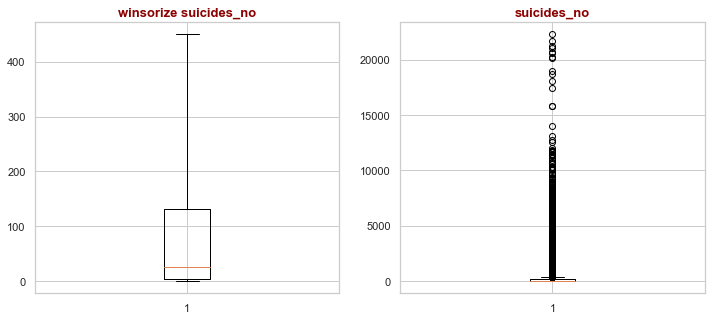

In [8]:
df["winsorize_suicides_no"] = winsorize(df["suicides_no"], (0, 0.11))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.boxplot(df["winsorize_suicides_no"], whis=2.5)
plt.title("winsorize suicides_no", fontdict=title_font)

plt.subplot(122)
plt.boxplot(df["suicides_no"])
plt.title("suicides_no", fontdict=title_font)
plt.show()

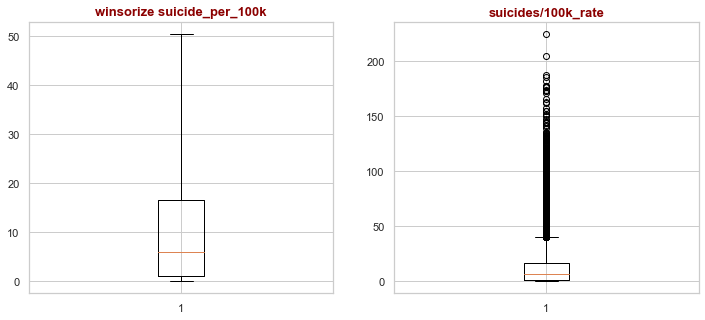

In [9]:
df["winsorize_suicide_per_100k"] = winsorize(df["suicide_per_100k"], (0,0.05))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.boxplot(df["winsorize_suicide_per_100k"], whis=2.5)
plt.title("winsorize suicide_per_100k", fontdict=title_font)

plt.subplot(122)
plt.boxplot(df["suicide_per_100k"])
plt.title("suicides/100k_rate", fontdict=title_font)
plt.show()

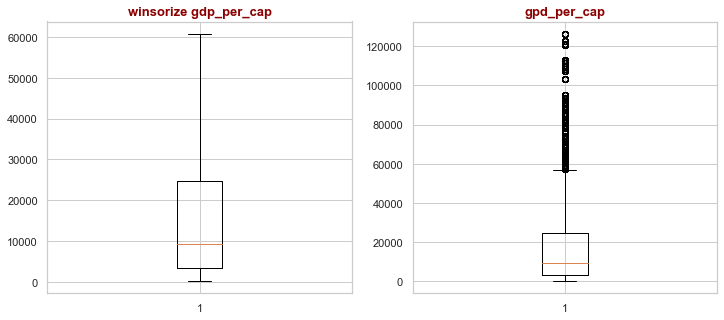

In [10]:
df["winsorize_gdp_per_cap"] = winsorize(df["gdp_per_cap"], (0, 0.03))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.boxplot(df["winsorize_gdp_per_cap"], whis=2.0)
plt.title("winsorize gdp_per_cap", fontdict=title_font)

plt.subplot(122)
plt.boxplot(df["gdp_per_cap"])
plt.title("gpd_per_cap", fontdict=title_font)
plt.show()

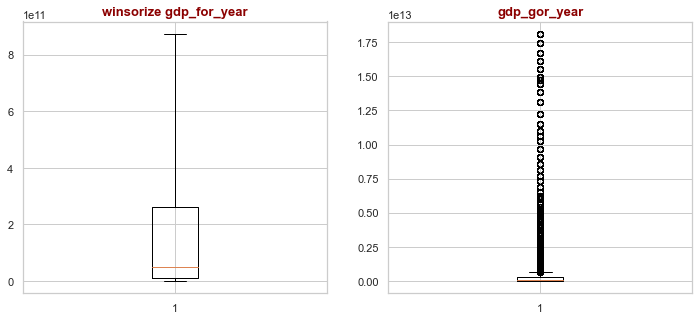

In [11]:
df["winsorize_gdp_for_year"] = winsorize(df["gdp_for_year"], (0, 0.11))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.boxplot(df["winsorize_gdp_for_year"], whis=2.5)
plt.title("winsorize gdp_for_year", fontdict=title_font)

plt.subplot(122)
plt.boxplot(df["gdp_for_year"])
plt.title("gdp_gor_year", fontdict=title_font)
plt.show()

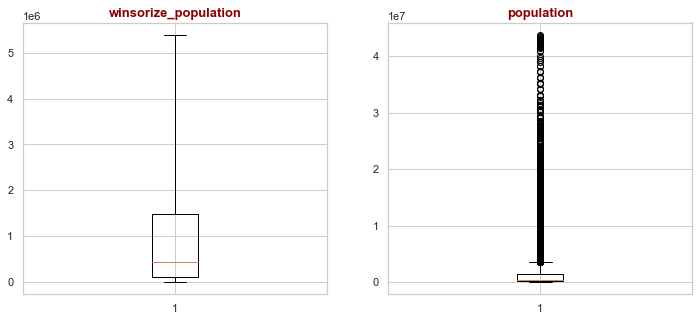

In [12]:
df["winsorize_population"]= winsorize(df["population"], (0,0.09))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.boxplot(df["winsorize_population"], whis=3.0)
plt.title("winsorize_population", fontdict=title_font)

plt.subplot(122)
plt.boxplot(df["population"])
plt.title("population", fontdict=title_font)
plt.show()

We should covert the data to logarithmic values for normalize the data.

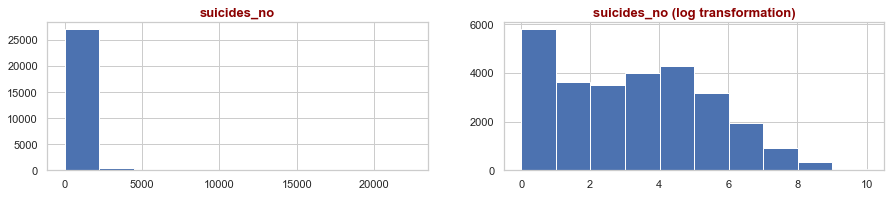

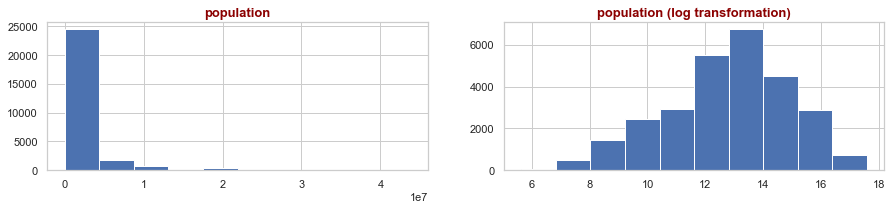

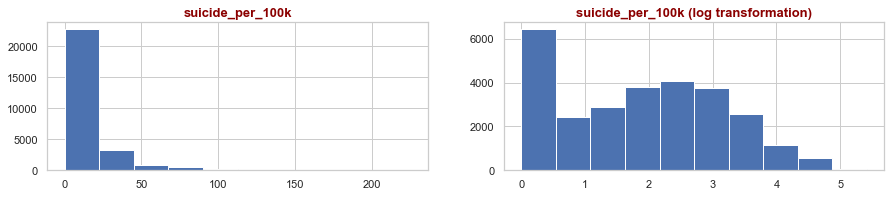

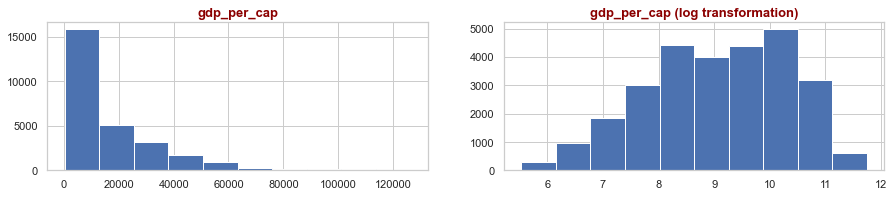

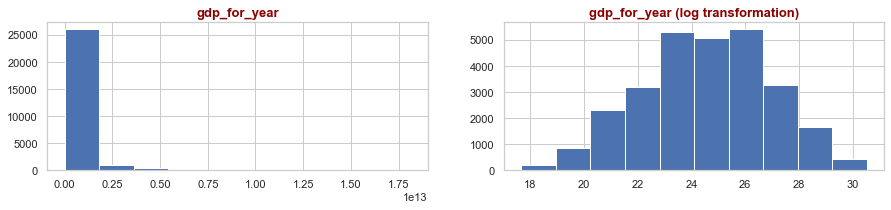

In [13]:
columns_name= ["suicides_no", "population", "suicide_per_100k",
               "gdp_per_cap", "gdp_for_year"]
for name in columns_name:
    plt.figure(figsize=(15,6))
    plt.subplot(2,2,1)
    plt.hist(df[name])
    plt.title(name, fontdict=title_font)
        
    plt.subplot(2,2,2)
    plt.hist(np.log(df[name]+1))
    plt.title(name+ " (log transformation)", fontdict=title_font)
    plt.show()

As we see the data approximate to normal distribution with logarithmic transformation.

In [14]:
columns_name= ["suicides_no", "population", "suicide_per_100k",
               "gdp_per_cap", "gdp_for_year"]
for name in columns_name:
    q75_log, q25_log = np.percentile(np.log(df[name]), [75,25])
    caa_log= q75_log-q25_log
    q75, q25 = np.percentile(df[name], [75,25])
    caa= q75-q25
    comparison = pd.DataFrame(columns= ["threshold", "outliers {}".format(name), "outliers_log"])
    for threshold in np.arange(1,5,0.5):
        max_value_log = q75_log+ (caa_log*threshold)
        min_value_log = q25_log- (caa_log*threshold)
        max_value = q75+ (caa*threshold)
        min_value = q25- (caa*threshold)
        outliers_log = len((np.where((np.log(df[name]+1)>max_value_log) | 
                               (np.log(df[name]+1)<min_value_log))[0]))
        outliers = len((np.where((df[name]>max_value) | 
                     (df[name]<min_value))[0]))
        comparison = comparison.append({"threshold": threshold, "outliers {}".format(name): outliers,
                              "outliers_log": outliers_log}, ignore_index=True)
    display(comparison)

,threshold,outliers suicides_no,outliers_log
0,1.0,4482.0,154.0
1,1.5,3877.0,0.0
2,2.0,3376.0,0.0
3,2.5,3026.0,0.0
4,3.0,2667.0,0.0
5,3.5,2433.0,0.0
6,4.0,2204.0,0.0
7,4.5,2029.0,0.0


,threshold,outliers population,outliers_log
0,1.0,4982.0,1241.0
1,1.5,4151.0,250.0
2,2.0,3297.0,11.0
3,2.5,2771.0,0.0
4,3.0,2377.0,0.0
5,3.5,2066.0,0.0
6,4.0,1832.0,0.0
7,4.5,1648.0,0.0


,threshold,outliers suicide_per_100k,outliers_log
0,1.0,2906.0,0.0
1,1.5,2040.0,0.0
2,2.0,1501.0,0.0
3,2.5,1160.0,0.0
4,3.0,892.0,0.0
5,3.5,698.0,0.0
6,4.0,512.0,0.0
7,4.5,340.0,0.0


,threshold,outliers gdp_per_cap,outliers_log
0,1.0,2352.0,276.0
1,1.5,996.0,0.0
2,2.0,600.0,0.0
3,2.5,444.0,0.0
4,3.0,288.0,0.0
5,3.5,168.0,0.0
6,4.0,84.0,0.0
7,4.5,36.0,0.0


,threshold,outliers gdp_for_year,outliers_log
0,1.0,4332.0,636.0
1,1.5,3576.0,60.0
2,2.0,3264.0,0.0
3,2.5,3000.0,0.0
4,3.0,2760.0,0.0
5,3.5,2580.0,0.0
6,4.0,2328.0,0.0
7,4.5,2064.0,0.0


The outliers also decreased with logarithmic transformation.

-------------------------------------------------------------------------------------------------------------------------------

In [15]:
suicide_filepath = "Suicide world cleaned.csv"
data = pd.read_csv(suicide_filepath, parse_dates=True)
data.head()

,country,year,sex,age,suicides_no,population,suicide_per_100k,gdp_for_year,gdp_per_cap,generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,Europe


#### Correlation

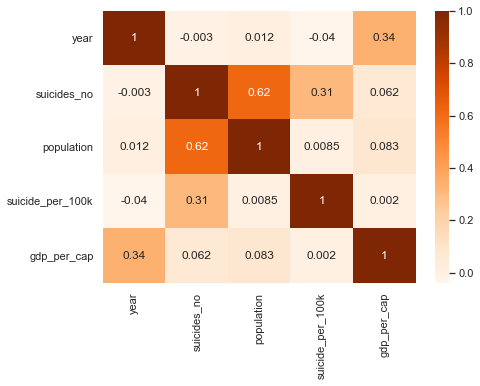

In [16]:
#Correlation heatmap

plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True, cmap='Oranges')
plt.show()

Data pre-processing for regression

In [17]:
#encoding the categorical features with LabelEncoder
import sklearn
from sklearn.preprocessing import LabelEncoder
categorical = ['country', 'year','age', 'sex', 'generation','continent']
le = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    data[column] = le.fit_transform(data[column])

In [18]:
#creating a copy of dataset for statistical test

stat_data = data.copy()
stat_data

,country,year,sex,age,suicides_no,population,suicide_per_100k,gdp_for_year,gdp_per_cap,generation,continent
0,0,2,1,0,21,312900,6.71,"2,156,624,900",796,2,3
1,0,2,1,2,16,308000,5.19,"2,156,624,900",796,5,3
2,0,2,0,0,14,289700,4.83,"2,156,624,900",796,2,3
3,0,2,1,5,1,21800,4.59,"2,156,624,900",796,1,3
4,0,2,1,1,9,274300,3.28,"2,156,624,900",796,0,3
...,...,...,...,...,...,...,...,...,...,...,...
27655,99,29,0,2,107,3620833,2.96,"63,067,077,179",2309,2,2
27656,99,29,0,5,9,348465,2.58,"63,067,077,179",2309,5,2
27657,99,29,1,3,60,2762158,2.17,"63,067,077,179",2309,3,2
27658,99,29,0,3,44,2631600,1.67,"63,067,077,179",2309,3,2


Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data. So, the numerical columns, population, gdp_for_year & gdp_per_cap are being standardized using SkLearn's RobustScalar.

In [19]:
#Checking the data type of each column

data.dtypes

country               int32
year                  int64
sex                   int32
age                   int32
suicides_no           int64
population            int64
suicide_per_100k    float64
gdp_for_year         object
gdp_per_cap           int64
generation            int32
continent             int32
dtype: object

In [20]:
# Converting the column 'gdp_for_year' to float from object

data['gdp_for_year'] = data['gdp_for_year'].str.replace(',','').astype(float)

In [21]:
#Scaling the numerical data columns with RobustScalar

numerical = ['suicides_no', 'population', 'suicide_per_100k', 
              'gdp_for_year','gdp_per_cap','continent']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
data[numerical] = rc.fit_transform(data[numerical])

In [22]:
data

,country,year,sex,age,suicides_no,population,suicide_per_100k,gdp_for_year,gdp_per_cap,generation,continent
0,0,2,1,0,-0.031008,-0.084553,0.046519,-0.182533,-0.397331,2,0.5
1,0,2,1,2,-0.069767,-0.088069,-0.050343,-0.182533,-0.397331,5,0.5
2,0,2,0,0,-0.085271,-0.101202,-0.073283,-0.182533,-0.397331,2,0.5
3,0,2,1,5,-0.186047,-0.293450,-0.088577,-0.182533,-0.397331,1,0.5
4,0,2,1,1,-0.124031,-0.112253,-0.172057,-0.182533,-0.397331,0,0.5
...,...,...,...,...,...,...,...,...,...,...,...
27655,99,29,0,2,0.635659,2.289268,-0.192449,0.059920,-0.326498,2,0.0
27656,99,29,0,5,-0.124031,-0.059031,-0.216664,0.059920,-0.326498,5,0.0
27657,99,29,1,3,0.271318,1.673070,-0.242791,0.059920,-0.326498,3,0.0
27658,99,29,0,3,0.147287,1.579380,-0.274653,0.059920,-0.326498,3,0.0


The data is split into train & test sets, 80-20 split.

In [23]:
# Sepratating & assigning features and target columns to X & y

y = data['suicide_per_100k']
X = data.drop('suicide_per_100k',axis=1)
X.shape, y.shape

((27660, 10), (27660,))

In [24]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((22128, 10), (5532, 10))

### Regression Analysis

In [25]:
#importing required libraries 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

### k-Nearest Neighbors Regression:

K nearest neighbors is a simple algorithm that stores all available cases and predict the numerical target based on a similarity measure (e.g., distance functions). A simple implementation of KNN regression is to calculate the average of the numerical target of the k nearest neighbors.

In [26]:
# KNN Regression model
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model
knn = KNeighborsRegressor()

param_grid = {'n_neighbors':list(range(1, 31)), 'weights': ['uniform', 'distance']}

# instantiate the grid
knn_grid = GridSearchCV(knn, param_grid , cv=10)

# fit the model 
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [27]:
#Checking the best parameters for the model
knn_para = knn_grid.best_params_
print(knn_para)

{'n_neighbors': 1, 'weights': 'uniform'}


In [28]:
#predicting the target value from the model for the samples
y_train_knn = knn_grid.predict(X_train)
y_test_knn = knn_grid.predict(X_test)

Performance Evaluation:

In [29]:
#computing the accuracy of the model performance
acc_train_knn = knn_grid.score(X_train, y_train) 
acc_test_knn = knn_grid.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print('\nKNN: The RMSE of the training set is:', rmse_train_knn)
print('KNN: The RMSE of the testing set is:', rmse_test_knn)

KNN: Accuracy on training Data: 1.000
KNN: Accuracy on test Data: 0.794

KNN: The RMSE of the training set is: 0.0
KNN: The RMSE of the testing set is: 0.5442578691854065


Evaluating training and testing set performance with different numbers of neighbors from 1 to 30. The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis.

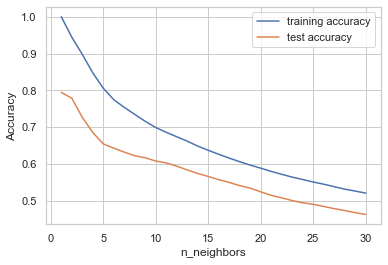

In [30]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 31)
for n in neighbors_settings:
    # fit the model
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

#plotting the training & testing accuracy for n_neighbours from 1 to 30
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

### Linear Regression
Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set.

In [31]:
# Linear regression model 
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()
# fit the model 
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

Performance Evaluation:

In [33]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.317
Linear Regression: Accuracy on test Data: 0.316

Linear Regression: The RMSE of the training set is: 1.0011369367505194
Linear Regression: The RMSE of the testing set is: 0.9925223870630583
